<a href="https://colab.research.google.com/github/zakyzuf/PCVK_Ganjil_2023/blob/main/Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Modul 9 – Morfologi <b>(Erosi, Dilasi, Opening, Closing, Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)</b>

1. Import folder yang ada di Drive Anda dengan cara sebagai berikut

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

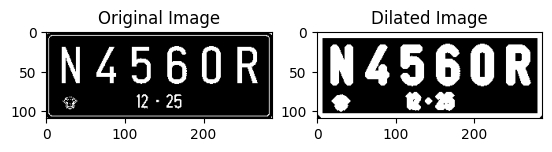

In [8]:
def dilate(image, sed, iterations):
    output = np.zeros(image.shape, dtype=np.uint8)
    rows, cols = image.shape

    # Looping untuk melakukan dilasi
    for k in range(iterations):
        for i in range(1, rows - 1):
            for j in range(1, cols - 1):
                if image[i, j] > 0:
                    output[i-1:i+2, j] = 255
                    output[i, j-1:j+2] = 255
        image = np.copy(output)

    return output

image = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',0)

# Konversi citra menjadi citra biner
ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Menerapkan dilasi dengan SED berbentuk cross 3 x 3
sed = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Jumlah iterasi dilasi
iterations = 3

dilated_image = dilate(thresh, sed, iterations)

# Menampilkan gambar asli dan hasil dilasi
plt.subplot(1, 2, 1), plt.imshow(thresh, 'gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(dilated_image, 'gray'), plt.title('Dilated Image')
plt.show()

 4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

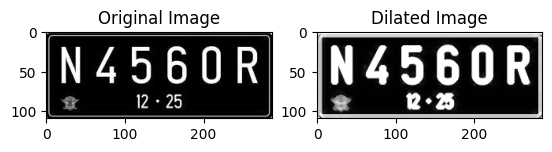

In [10]:
image = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',0)

# Kernel untuk dilasi
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan operasi dilasi
dilated_image = cv2.dilate(image, kernel, iterations=2)

# Menampilkan gambar asli dan hasil dilasi
plt.subplot(1, 2, 1), plt.imshow(image, 'gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(dilated_image, 'gray'), plt.title('Dilated Image')
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

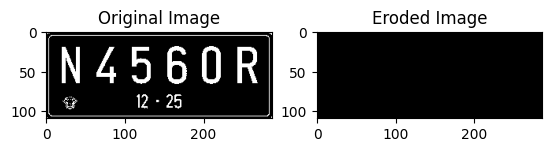

In [18]:
def erode(image, se):
    output = np.zeros(image.shape, dtype=np.uint8)
    rows, cols = image.shape

    # Looping untuk melakukan erosi
    for i in range(2, rows - 2):
        for j in range(2, cols - 2):
            if np.all(image[i-2:i+3, j-2:j+3] == se):
                output[i, j] = 255

    return output

image = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',0)

# Konversi citra menjadi citra biner
ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Buat Structuring Element (SE) berbentuk square 5 x 5
se = np.ones((5, 5), np.uint8)

# Terapkan erosi
eroded_image = erode(thresh, se)

# Tampilkan gambar asli dan hasil erosi
plt.subplot(1, 2, 1), plt.imshow(thresh, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(eroded_image, cmap='gray'), plt.title('Eroded Image')
plt.show()
